In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plotar_coordenadas_polares(arquivo):
    """
    Função para ler arquivo e criar gráfico polar, ignorando a primeira linha
    
    Parameters:
    arquivo (str): Caminho para o arquivo de dados
    """
    try:
        # Carrega os dados do arquivo, pulando a primeira linha
        dados = np.loadtxt('orbit_data.txt', skiprows=1)
        
        # Extrai as colunas 2 e 3 (índices 1 e 2 em Python)
        raios = dados[:, 1]  # coluna 2
        angulos = dados[:, 2]  # coluna 3
        
        # Remove linhas com NaN
        mask = ~np.isnan(raios) & ~np.isnan(angulos)
        raios = raios[mask]
        angulos = angulos[mask]
        
        # Cria a figura com subplot polar
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='polar')
        
        # Plota os dados como linha fina
        ax.plot(angulos, raios, linewidth=1)
        
        # Define o limite do raio para mostrar todos os dados
        ax.set_ylim(0, np.max(raios) * 1.1)
        
        # Personaliza o gráfico
        ax.set_title('r versus phi')
        ax.grid(True)
        
        # Exibe o gráfico
        plt.show()
        
    except FileNotFoundError:
        print(f"Erro: O arquivo {'orbit_data.txt'} não foi encontrado.")
    except IndexError:
        print("Erro: O arquivo não possui colunas suficientes.")
    except Exception as e:
        print(f"Erro inesperado: {str(e)}")

    

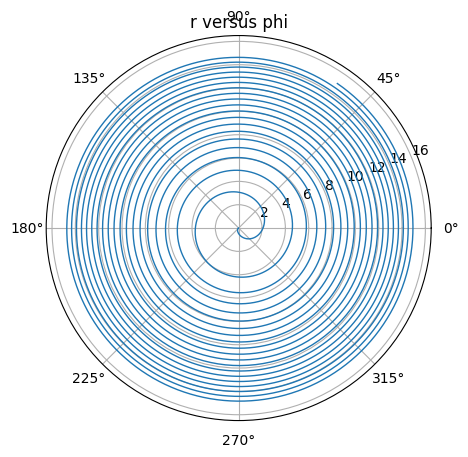

In [2]:
plotar_coordenadas_polares('orbit_data.txt')